# <b>Riding The Data Trail</b>
## Notebook 3: Modeling & Hyperparameter Tuning

# Table of contents
* [Import Libraries](#import-libraries)
* [Import csv](#import-csv)
* [Pre-Modeling Prep](#pre-modeling-prep)   
    * [Variable: low_price range](#variable-define-low_price-as-listings-having-current_listing_price-between-500---10000)  
    * [Variable: train_test_split size](#variable-train_test_split-size)  
    * [Variable: transformation on target variable](#variable-carry-out-transformation-on-current_listing_price-to-get-a-normal-distribution)   
* [Create new df for modeling](#create-a-new-df-in-preparation-for-modeling)  
* [Modeling](#modeling)  
    * [Linear Regression Models](#linear-regression-models)  
    * [Other Models](#other-models)  
    * [Results Dictionary](#results-dictionary)  
* [Best Model Selection](#best-model-selection)  
* [Dimensionality Reduction](#dimensionality-reduction)  
* [Modeling after Dimensionality Reduction](#modeling-after-dimensionality-reduction)  
* [GridSearchCV](#gridsearchcv)  
* [Comments on Further Improving Model Score](#comments-on-further-improving-model-score)  

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Import csv

In [2]:
current_directory = os.getcwd()
file_path = os.path.join(current_directory, '../data', 'cleaned_df.csv')

df = pd.read_csv(file_path)

In [3]:
df

,no_of_likes,no_of_images,title,listing_price,item_condition,deal_method,post_date,category_type,post_type,condition_subtext,...,posts,current_listing_price,last_listing_price,contains_brand,brands,len_posts,post_word_count,emojis,num_emojis,lemma_posts
0,4,6,"Specialized Allez Sport - Year 2020, Size 52","2,200",Lightly used,Meetup,2 days ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",...,"Specialized Allez Sport - Year 2020, Size 52 >...",2200.0,NaN,True,"Specialized, SPECIALIZED, SPECIALISED, Allez, ...",481,85,NaN,0,specialized allez sport year 2020 size 52 2020...
1,14,3,Giant OCR,500,Well used,Meetup,1 week ago,Road Bikes,Posted,Has minor flaws or defects.,...,"Giant OCR M size claris Shifters, FD, RD Mavic...",500.0,NaN,True,Giant,62,11,NaN,0,giant ocr m size claris shifters fd rd mavic c...
2,9,7,Polygon Hybrid Bicycle,500,Lightly used,Mailing,1 week ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",...,Polygon Hybrid Bicycle Lightly used bike Was o...,500.0,NaN,True,look,487,87,NaN,0,polygon hybrid bicycle lightly bike balcony cl...
3,28,5,"Cervelo P5X tt bike, road bike triathlon bike ...","16,000",Like new,Meetup,23 hours ago,Road Bikes,Bumped,Used once or twice. As good as new.,...,"Cervelo P5X tt bike, road bike triathlon bike ...",16000.0,NaN,True,"Cervelo, Cervelo, Cervelo",739,132,NaN,0,cervelo p5x tt bike road bike triathlon bike p...
4,1,7,WTS/WTT Scott Speedster 20 (Size 56),"2,000",Like new,Meetup,2 days ago,Road Bikes,Posted,Used once or twice. As good as new.,...,WTS/WTT Scott Speedster 20 (Size 56) Bought fr...,2000.0,NaN,True,Scott,1237,186,NaN,0,wts wtt scott speedster 20 size 56 buy kh cycl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,55,9,WTT/WTS Specialized Allez Sprint 2022,"5,999",Like new,Meetup,3 weeks ago,Road Bikes,Posted,Used once or twice. As good as new.,...,WTT/WTS Specialized Allez Sprint 2022 Up for s...,5999.0,NaN,True,", Giant, Trek, Orbea, Canyon, Pinarello, Dogma...",984,142,NaN,0,wtt wts specialized allez sprint 2022 sale tra...
1439,3,1,Argon 18 Gallium Pro Astana,"5,000",Lightly used,Meetup,13 hours ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",...,Argon 18 Gallium Pro Astana Medium 175-185cm N...,5000.0,NaN,True,NaN,283,45,NaN,0,argon 18 gallium pro astana medium 175 185 cm ...
1440,17,1,Orbea Full carbon road bike frame with ultegra...,600,Well used,Meetup,Yesterday,Road Bikes,Posted,Has minor flaws or defects.,...,Orbea Full carbon road bike frame with ultegra...,600.0,NaN,True,Orbea,141,25,NaN,0,orbea carbon road bike frame ultegra titanium ...
1441,29,3,Merida Reacto Di2 7000E Full Carbon Aero Roadb...,"4,299",Like new,Meetup,2 weeks ago,Road Bikes,Posted,Used once or twice. As good as new.,...,Merida Reacto Di2 7000E Full Carbon Aero Roadb...,4299.0,NaN,True,"Giant, Specialised, Merida, merida",801,133,NaN,0,merida reacto di2 7000e carbon aero roadbike u...


# Pre-Modeling Prep

Before we start modeling, there are 3 variables which may affect model performance:
1. Modeling on a subset of the dataset, by defining a low_price dataframe with current_listing_price in a specific range.
2. train_train_split size
3. Transformation on Target Variable `current_listing_price`

## Variable: Define low_price as listings having current_listing_price between $500 - $10,000

In [4]:
low_price = df[(df['current_listing_price'] >= 500) & (df['current_listing_price'] <= 10000)]
len(low_price)

1234

## Variable: train_test_split size

In [5]:
test_size = 0.2

## Variable: carry out transformation on current_listing_price to get a normal distribution

State of Current Listing Price - low_price group

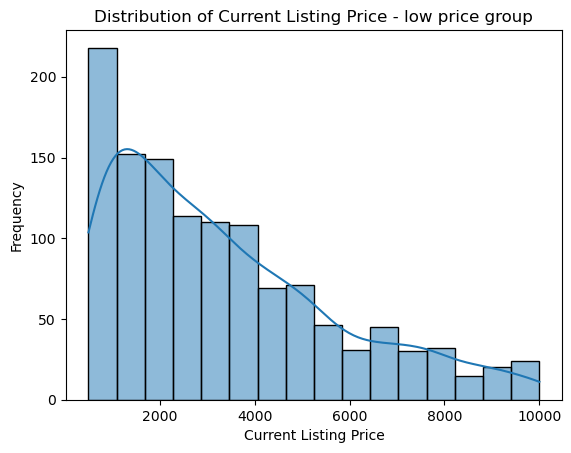

In [6]:
sns.histplot(low_price['current_listing_price'], kde=True)

plt.title('Distribution of Current Listing Price - low price group')
plt.xlabel('Current Listing Price')
plt.ylabel('Frequency')
plt.show()

Target variable does not seem normally distributed; let's transform it using:
* log transformation
* square root transformation
* boxcox transformation
* yeojohnson transformation

/var/folders/jv/vqyftcs92v5_1kzvbv8kdcx40000gn/T/ipykernel_6237/3775671330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price['current_listing_price_log'] = np.log(low_price['current_listing_price'] + 1)
/var/folders/jv/vqyftcs92v5_1kzvbv8kdcx40000gn/T/ipykernel_6237/3775671330.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price['current_listing_price_sqrt'] = np.sqrt(low_price['current_listing_price'])
/var/folders/jv/vqyftcs92v5_1kzvbv8kdcx40000gn/T/ipykernel_6237/3775671330.py:7: Set

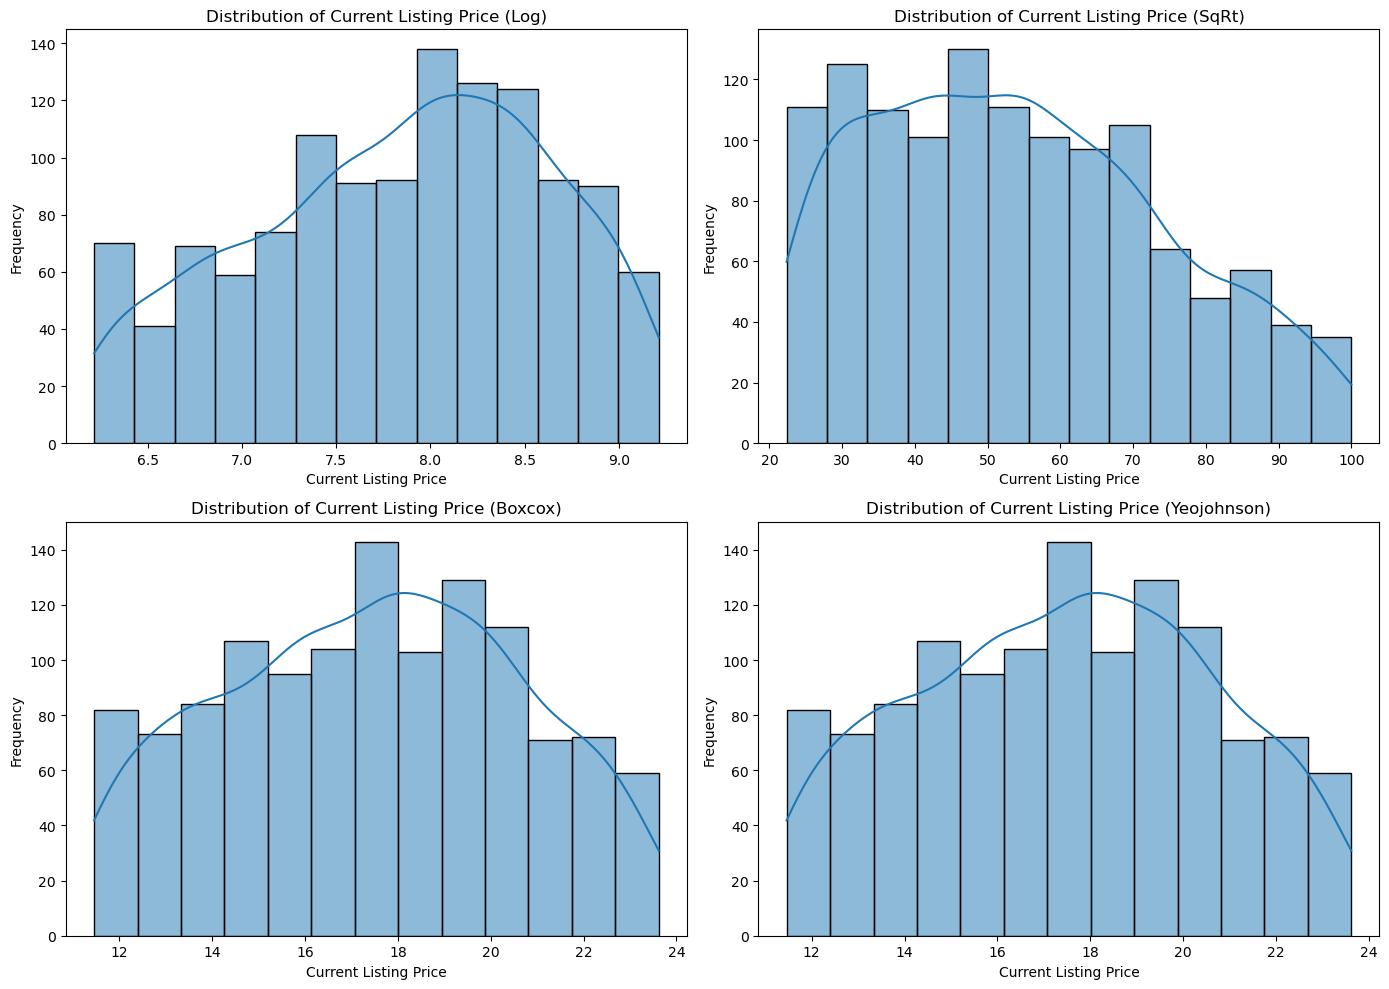

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()  # axes is now a 1D array, so we can iterate over it

# Create transformed versions of 'current_listing_price'
low_price['current_listing_price_log'] = np.log(low_price['current_listing_price'] + 1)
low_price['current_listing_price_sqrt'] = np.sqrt(low_price['current_listing_price'])
low_price['current_listing_price_boxcox'], lambda_val_bc = stats.boxcox(low_price['current_listing_price'] + 1)
low_price['current_listing_price_yeojohnson'], lambda_val_yj = stats.yeojohnson(low_price['current_listing_price'])

# Create a list of column names and corresponding titles
columns = ['current_listing_price_log', 'current_listing_price_sqrt', 'current_listing_price_boxcox', 'current_listing_price_yeojohnson']
titles = ['Log', 'SqRt', 'Boxcox', 'Yeojohnson']

# Plot each transformed column in a subplot
for ax, column, title in zip(axes, columns, titles):
    sns.histplot(low_price[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of Current Listing Price ({title})')
    ax.set_xlabel('Current Listing Price')
    ax.set_ylabel('Frequency')

# Automatically adjust subplot params so that the subplots fits into the figure area
plt.tight_layout()

# Display the plot
plt.show()

Both Boxcox and Yeojohnson transformations give similar results and have brought target variable closer to a normal distribution. Let's work with Boxcox transformation.

## Create a new df in preparation for modeling

In [8]:
low_price_bicycle_df= low_price[['no_of_likes', 'no_of_images', 'item_condition', 'seller_stars_rating', 'reviews_of_seller', 'len_posts', 'post_word_count', 'lemma_posts', 'current_listing_price_boxcox']]

In [9]:
low_price_bicycle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1442
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_likes                   1234 non-null   int64  
 1   no_of_images                  1234 non-null   int64  
 2   item_condition                1234 non-null   object 
 3   seller_stars_rating           1234 non-null   float64
 4   reviews_of_seller             1234 non-null   int64  
 5   len_posts                     1234 non-null   int64  
 6   post_word_count               1234 non-null   int64  
 7   lemma_posts                   1234 non-null   object 
 8   current_listing_price_boxcox  1234 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 96.4+ KB


# Modeling

In [10]:
# Def a function to fit model, get y_pred, get model score. Also to add results to results_dict.
# Inputs: X, y, pipe, model_name, results_dict

def fit_pred_score(X, y, pipe, model_name, results_dict):
    
    # Split the data into train & test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the data
    pipe.fit(X_train, y_train)
    display(pipe)

    # Get y_pred with model
    y_pred = pipe.predict(X_test)

    # Calc RMSE
    # In order to calculate RMSE we need to inverse both y_test and y-pred
    y_pred_inv = inv_boxcox(y_pred, lambda_val_bc)
    y_test_inv = inv_boxcox(y_test, lambda_val_bc)
    rmse = mean_squared_error((y_test_inv-1), (y_pred_inv-1), squared=False)
    # rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Get R^2 scores
    r2_train = pipe.score(X_train, y_train)
    r2_test = pipe.score(X_test, y_test)

    # Print scores
    print(f"RMSE: {rmse}")
    print(f'R^2 (train): {r2_train}')
    print(f'R^2 (test): {r2_test}')
    print('--------------------------------------------------')

    each_model={}
    # Store the results
    each_model['model_name'] = model_name
    each_model['RMSE'] = rmse
    each_model['R^2 train'] = r2_train
    each_model['R^2 test'] = r2_test

    results_dict.append(each_model)

results_dict = []

In [11]:
# Define the X and y
X = low_price_bicycle_df.drop('current_listing_price_boxcox', axis=1)
y = low_price_bicycle_df['current_listing_price_boxcox']

## Linear Regression Models

In [12]:
# fit_pred_score on Count/TF-IDF Vectorizer with Linear Regression, Ridge and Lasso

cvec_ohe_preprocess = ColumnTransformer(
    [('cvec', CountVectorizer(max_df=0.95, max_features=5000, min_df=2), 'lemma_posts'),
    ('OHE', OneHotEncoder(), ['item_condition'])],
    remainder='passthrough')

tfidf_ohe_preprocess = ColumnTransformer(
    [('tfidf', TfidfVectorizer(max_df=0.95, max_features=5000, min_df=2), 'lemma_posts'),
    ('OHE', OneHotEncoder(), ['item_condition'])],
    remainder='passthrough')

# Model 1: cvec, LinearRegression
cvec_lr_pipeline = Pipeline([
    ('cvec_ohe_reprocessing', cvec_ohe_preprocess),
    ('lr', LinearRegression())
    ])
print('Count Vectorizer with Linear Regression')
cvec_lr_model = fit_pred_score(X, y, cvec_lr_pipeline, 'cvec_lr', results_dict)

# Model 2: tfidf, LinearRegression
tfidf_lr_pipeline = Pipeline([
    ('tfidf_ohe_preprocessing', tfidf_ohe_preprocess),
    ('lr', LinearRegression())
    ])
print('TF-IDF Vectorizer with Linear Regression')
tfidf_lr_model = fit_pred_score(X, y, tfidf_lr_pipeline, 'tfidf_lr', results_dict)

# Model 3: cvec, Ridge
cvec_ridge_pipeline = Pipeline([
    ('cvec_ohe_preprocessing', cvec_ohe_preprocess),
    ('ridge', Ridge())
    ])
print('Count Vectorizer with Linear Regression with Ridge Regularization')
cvec_ridge_model = fit_pred_score(X, y, cvec_ridge_pipeline, 'cvec_ridge', results_dict)

# Model 4: tfidf, Ridge
tfidf_ridge_pipeline = Pipeline([
    ('tfidf_ohe_preprocessing', tfidf_ohe_preprocess),
    ('ridge', Ridge())
    ])
print('TF-IDF Vectorizer with Linear Regression with Ridge Regularization')
tfidf_ridge_model = fit_pred_score(X, y, tfidf_ridge_pipeline, 'tfidf_ridge', results_dict)

# Model 5: cvec, Lasso
cvec_lasso_pipeline = Pipeline([
    ('cvec_ohe_preprocessing', cvec_ohe_preprocess),
    ('lasso', Lasso())
])
print('Count Vectorizer with Linear Regression with Lasso Regularization')
tfidf_lasso_model = fit_pred_score(X, y, cvec_lasso_pipeline, 'cvec_lasso', results_dict)

# Model 6: tfidf, Lasso
tfidf_lasso_pipeline = Pipeline([
    ('tfidf_ohe_preprocessing', tfidf_ohe_preprocess),
    ('lasso', Lasso())
])
print('TF-IDF Vectorizer with Linear Regression with Lasso Regularization')
tfidf_lasso_model = fit_pred_score(X, y, tfidf_lasso_pipeline, 'tfidf_lasso', results_dict)

Count Vectorizer with Linear Regression


Pipeline(steps=[('cvec_ohe_reprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cvec',
                                                  CountVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('lr', LinearRegression())])

RMSE: 6293.0064177904005
R^2 (train): 0.9980555454145078
R^2 (test): -0.7397495298830137
--------------------------------------------------
TF-IDF Vectorizer with Linear Regression


Pipeline(steps=[('tfidf_ohe_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('lr', LinearRegression())])

RMSE: 1689.5588194593854
R^2 (train): 0.9948027882444219
R^2 (test): 0.5926458147445706
--------------------------------------------------
Count Vectorizer with Linear Regression with Ridge Regularization


Pipeline(steps=[('cvec_ohe_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cvec',
                                                  CountVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('ridge', Ridge())])

RMSE: 3151.6779348398472
R^2 (train): 0.9795815384122808
R^2 (test): 0.22105737198534703
--------------------------------------------------
TF-IDF Vectorizer with Linear Regression with Ridge Regularization


Pipeline(steps=[('tfidf_ohe_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('ridge', Ridge())])

RMSE: 1554.0561091098677
R^2 (train): 0.8487776134128876
R^2 (test): 0.6818104822504591
--------------------------------------------------
Count Vectorizer with Linear Regression with Lasso Regularization


Pipeline(steps=[('cvec_ohe_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cvec',
                                                  CountVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('lasso', Lasso())])

RMSE: 2462.311658921479
R^2 (train): 0.014580695048384551
R^2 (test): 0.018309580034196138
--------------------------------------------------
TF-IDF Vectorizer with Linear Regression with Lasso Regularization


Pipeline(steps=[('tfidf_ohe_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('lasso', Lasso())])

RMSE: 2462.311658921479
R^2 (train): 0.014580695048384551
R^2 (test): 0.018309580034196138
--------------------------------------------------


## Other Models

In [13]:
# fit_pred_score on Count/TF-IDF Vectorizer with SVR, Gradient Boosting Regressor, XGBoost, CatBoost
ss_cvec_ohe_preprocess = ColumnTransformer(
    [('ss', StandardScaler(), ['no_of_likes', 'no_of_images', 'seller_stars_rating', 'reviews_of_seller', 'len_posts', 'post_word_count']),
        ('cvec', CountVectorizer(max_df=0.95, max_features=5000, min_df=2), 'lemma_posts'),
     ('OHE', OneHotEncoder(), ['item_condition'])],
    remainder='passthrough')

ss_tfidf_ohe_preprocess = ColumnTransformer(
    [('ss', StandardScaler(), ['no_of_likes', 'no_of_images', 'seller_stars_rating', 'reviews_of_seller', 'len_posts', 'post_word_count']),
        ('tfidf', TfidfVectorizer(max_df=0.95, max_features=5000, min_df=2), 'lemma_posts'),
     ('OHE', OneHotEncoder(), ['item_condition'])],
    remainder='passthrough')

cvec_ohe_preprocess = ColumnTransformer(
    [('cvec', CountVectorizer(max_df=0.95, max_features=5000, min_df=2), 'lemma_posts'),
     ('OHE', OneHotEncoder(), ['item_condition'])],
    remainder='passthrough')

tfidf_ohe_preprocess = ColumnTransformer(
    [('tfidf', TfidfVectorizer(max_df=0.95, max_features=5000, min_df=2), 'lemma_posts'),
     ('OHE', OneHotEncoder(), ['item_condition'])],
    remainder='passthrough')

# Model 7: cvec, SVR
cvec_svr_pipeline = Pipeline([
    ('ss_cvec_ohe_preprocess', ss_cvec_ohe_preprocess),
    ('svr', SVR())
    ])
print('Count Vectorizer with SVR')
cvec_svr_model = fit_pred_score(X, y, cvec_svr_pipeline, 'cvec_svr', results_dict)

# Model 8: tfidf, SVR
tfidf_svr_pipeline = Pipeline([
    ('ss_tfidf_ohe_preprocess', ss_tfidf_ohe_preprocess),
    ('svr', SVR())
    ])
print('TF-IDF Vectorizer with SVR')
tfidf_svr_model = fit_pred_score(X, y, tfidf_svr_pipeline, 'tfidf_svr', results_dict)

# Model 9: cvec, Gradient Boosting Regressor
cvec_gbr_pipeline = Pipeline([
    ('cvec_ohe_preprocess', cvec_ohe_preprocess),
    ('gbr', GradientBoostingRegressor())
    ])
print('Count Vectorizer with Gradient Boosting Regressor')
cvec_gbr_model = fit_pred_score(X, y, cvec_gbr_pipeline, 'cvec_gbr', results_dict)

# Model 10: tfidf, Gradient Boosting Regressor
tfidf_gbr_pipeline = Pipeline([
    ('tfidf_ohe_preprocess', tfidf_ohe_preprocess),
    ('gbr', GradientBoostingRegressor())
    ])
print('TF-IDF Vectorizer with Gradient Boosting Regressor')
tfidf_gbr_model = fit_pred_score(X, y, tfidf_gbr_pipeline, 'tfidf_gbr', results_dict)

# Model 11: cvec, XGBoost Regressor
cvec_xgb_pipeline = Pipeline([
    ('cvec_ohe_preprocessing', cvec_ohe_preprocess),
    ('xgb', XGBRegressor())
    ])
print('Count Vectorizer with XGBoost Regressor')
cvec_xgb_model = fit_pred_score(X, y, cvec_xgb_pipeline, 'cvec_xgb', results_dict)

# Model 12: tfidf, XGBoost Regressor
tfidf_xgb_pipeline = Pipeline([
    ('tfidf_ohe_preprocess', tfidf_ohe_preprocess),
    ('xgb', XGBRegressor())
    ])
print('TF-IDF Vectorizer with XGBoost Regressor')
tfidf_xgb_model = fit_pred_score(X, y, tfidf_xgb_pipeline, 'tfidf_xgb', results_dict)

# Model 13: cvec, CatBoost
cvec_cb_pipeline = Pipeline([
    ('cvec_ohe_preprocessing', cvec_ohe_preprocess),
    ('cb', CatBoostRegressor())
    ])
print('Count Vectorizer with CatBoost Regressor')
cvec_cb_model = fit_pred_score(X, y, cvec_cb_pipeline, 'cvec_cb', results_dict)

# Model 14: tfidf, CatBoost
tfidf_cb_pipeline = Pipeline([
    ('tfidf_ohe_preprocessing', tfidf_ohe_preprocess),
    ('cb', CatBoostRegressor())
    ])
print('TF-IDF Vectorizer with CatBoost Regressor')
tfidf_cb_model = fit_pred_score(X, y, tfidf_cb_pipeline, 'tfidf_cb', results_dict)

Count Vectorizer with SVR


Pipeline(steps=[('ss_cvec_ohe_preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['no_of_likes',
                                                   'no_of_images',
                                                   'seller_stars_rating',
                                                   'reviews_of_seller',
                                                   'len_posts',
                                                   'post_word_count']),
                                                 ('cvec',
                                                  CountVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('svr', SVR())])

RMSE: 1985.7087162762064
R^2 (train): 0.6032075305729023
R^2 (test): 0.44829612377218453
--------------------------------------------------
TF-IDF Vectorizer with SVR


Pipeline(steps=[('ss_tfidf_ohe_preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['no_of_likes',
                                                   'no_of_images',
                                                   'seller_stars_rating',
                                                   'reviews_of_seller',
                                                   'len_posts',
                                                   'post_word_count']),
                                                 ('tfidf',
                                                  TfidfVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('svr', SVR())])

RMSE: 2246.1580506998257
R^2 (train): 0.34614330994083886
R^2 (test): 0.2207998569634655
--------------------------------------------------
Count Vectorizer with Gradient Boosting Regressor


Pipeline(steps=[('cvec_ohe_preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cvec',
                                                  CountVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('gbr', GradientBoostingRegressor())])

RMSE: 1823.3455995134686
R^2 (train): 0.7132605823269551
R^2 (test): 0.5240408800369889
--------------------------------------------------
TF-IDF Vectorizer with Gradient Boosting Regressor


Pipeline(steps=[('tfidf_ohe_preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('gbr', GradientBoostingRegressor())])

RMSE: 1825.0186364057274
R^2 (train): 0.7510966047430104
R^2 (test): 0.5308422173024052
--------------------------------------------------
Count Vectorizer with XGBoost Regressor


Pipeline(steps=[('cvec_ohe_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cvec',
                                                  CountVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=N...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

RMSE: 1619.628577219382
R^2 (train): 0.9737034484865809
R^2 (test): 0.5867491095142296
--------------------------------------------------
TF-IDF Vectorizer with XGBoost Regressor


Pipeline(steps=[('tfidf_ohe_preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=No...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

RMSE: 1711.7426158180892
R^2 (train): 0.9880505664860242
R^2 (test): 0.5509832779066332
--------------------------------------------------
Count Vectorizer with CatBoost Regressor
Learning rate set to 0.040858
0:	learn: 3.1617167	total: 62ms	remaining: 1m 1s
1:	learn: 3.1341637	total: 64.8ms	remaining: 32.3s
2:	learn: 3.1095129	total: 67.5ms	remaining: 22.4s
3:	learn: 3.0862228	total: 70.2ms	remaining: 17.5s
4:	learn: 3.0629822	total: 72.8ms	remaining: 14.5s
5:	learn: 3.0370853	total: 75.7ms	remaining: 12.5s
6:	learn: 3.0185541	total: 78.4ms	remaining: 11.1s
7:	learn: 2.9970569	total: 81.2ms	remaining: 10.1s
8:	learn: 2.9771184	total: 83.8ms	remaining: 9.23s
9:	learn: 2.9556743	total: 86.9ms	remaining: 8.6s
10:	learn: 2.9374728	total: 89.8ms	remaining: 8.07s
11:	learn: 2.9198498	total: 92.6ms	remaining: 7.62s
12:	learn: 2.8994615	total: 95.3ms	remaining: 7.24s
13:	learn: 2.8802598	total: 98ms	remaining: 6.9s
14:	learn: 2.8671181	total: 101ms	remaining: 6.62s
15:	learn: 2.8502083	total:

Pipeline(steps=[('cvec_ohe_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cvec',
                                                  CountVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('cb',
                 <catboost.core.CatBoostRegressor object at 0x1040b58a0>)])

RMSE: 1592.5800769763937
R^2 (train): 0.9037823671388977
R^2 (test): 0.639967815043768
--------------------------------------------------
TF-IDF Vectorizer with CatBoost Regressor
Learning rate set to 0.040858
0:	learn: 3.1652522	total: 9.8ms	remaining: 9.79s
1:	learn: 3.1341882	total: 18.3ms	remaining: 9.13s
2:	learn: 3.1048248	total: 24.3ms	remaining: 8.08s
3:	learn: 3.0786151	total: 30.6ms	remaining: 7.61s
4:	learn: 3.0551160	total: 36.4ms	remaining: 7.25s
5:	learn: 3.0324576	total: 42.5ms	remaining: 7.05s
6:	learn: 3.0055761	total: 48.6ms	remaining: 6.89s
7:	learn: 2.9808443	total: 54.6ms	remaining: 6.76s
8:	learn: 2.9617630	total: 61ms	remaining: 6.72s
9:	learn: 2.9455589	total: 67ms	remaining: 6.63s
10:	learn: 2.9261006	total: 73ms	remaining: 6.57s
11:	learn: 2.9069903	total: 79.2ms	remaining: 6.52s
12:	learn: 2.8854567	total: 85.2ms	remaining: 6.47s
13:	learn: 2.8678848	total: 92.1ms	remaining: 6.48s
14:	learn: 2.8522373	total: 98.2ms	remaining: 6.45s
15:	learn: 2.8373797	total:

Pipeline(steps=[('tfidf_ohe_preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('cb',
                 <catboost.core.CatBoostRegressor object at 0x1499f04f0>)])

RMSE: 1648.08746379701
R^2 (train): 0.9422464446312077
R^2 (test): 0.6260199302188723
--------------------------------------------------


For CatBoost Model: instead of applying OHE on `item_condition`, use Ordinal Encoder

In [14]:
from sklearn.preprocessing import OrdinalEncoder


cvec_preprocessor = ColumnTransformer(
    [('cvec', CountVectorizer(max_df=0.95, max_features=5000, min_df=2), 'lemma_posts'),
     ('ordinal', OrdinalEncoder(), ['item_condition'])
    ],
    remainder='passthrough')

tfidf_preprocessor = ColumnTransformer(
    [('tfidf', TfidfVectorizer(max_df=0.95, max_features=5000, min_df=2), 'lemma_posts'),
     ('ordinal', OrdinalEncoder(), ['item_condition'])
    ],
    remainder='passthrough')

# Model 13: cvec, CatBoost
cvec_cb_pipeline = Pipeline([
    ('cvec_preprocessor', cvec_preprocessor),
    ('cb', CatBoostRegressor())
    ])
print('Count Vectorizer with CatBoost Regressor')
cvec_cb_model = fit_pred_score(X, y, cvec_cb_pipeline, 'cvec_cb_ordinal', results_dict)

# Model 14: tfidf, CatBoost
tfidf_cb_pipeline = Pipeline([
    ('tfidf_preprocessor', tfidf_preprocessor),
    ('cb', CatBoostRegressor())
    ])
print('TF-IDF Vectorizer with CatBoost Regressor')
tfidf_cb_model = fit_pred_score(X, y, tfidf_cb_pipeline, 'tfidf_cb_ordinal', results_dict)

Count Vectorizer with CatBoost Regressor
Learning rate set to 0.040858
0:	learn: 3.1678350	total: 3.71ms	remaining: 3.7s
1:	learn: 3.1419358	total: 6.51ms	remaining: 3.25s
2:	learn: 3.1167233	total: 9.95ms	remaining: 3.31s
3:	learn: 3.0942663	total: 12.7ms	remaining: 3.15s
4:	learn: 3.0707309	total: 15.4ms	remaining: 3.07s
5:	learn: 3.0477211	total: 18.1ms	remaining: 3s
6:	learn: 3.0300400	total: 20.9ms	remaining: 2.97s
7:	learn: 3.0111767	total: 23.7ms	remaining: 2.94s
8:	learn: 2.9912554	total: 26.6ms	remaining: 2.92s
9:	learn: 2.9676399	total: 29.4ms	remaining: 2.9s
10:	learn: 2.9436288	total: 32.1ms	remaining: 2.89s
11:	learn: 2.9270726	total: 34.9ms	remaining: 2.88s
12:	learn: 2.9067829	total: 37.7ms	remaining: 2.87s
13:	learn: 2.8955148	total: 40.7ms	remaining: 2.87s
14:	learn: 2.8781137	total: 43.5ms	remaining: 2.86s
15:	learn: 2.8647669	total: 46.3ms	remaining: 2.85s
16:	learn: 2.8535750	total: 49.1ms	remaining: 2.84s
17:	learn: 2.8381344	total: 51.8ms	remaining: 2.83s
18:	lear

Pipeline(steps=[('cvec_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cvec',
                                                  CountVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['item_condition'])])),
                ('cb',
                 <catboost.core.CatBoostRegressor object at 0x149ea58a0>)])

RMSE: 1627.2218541737952
R^2 (train): 0.9031336637930767
R^2 (test): 0.6227026983521343
--------------------------------------------------
TF-IDF Vectorizer with CatBoost Regressor
Learning rate set to 0.040858
0:	learn: 3.1639889	total: 8.71ms	remaining: 8.7s
1:	learn: 3.1369457	total: 16.4ms	remaining: 8.2s
2:	learn: 3.1050321	total: 23.4ms	remaining: 7.79s
3:	learn: 3.0836363	total: 29.5ms	remaining: 7.35s
4:	learn: 3.0546231	total: 35.9ms	remaining: 7.14s
5:	learn: 3.0218610	total: 41.9ms	remaining: 6.95s
6:	learn: 3.0008130	total: 48.2ms	remaining: 6.84s
7:	learn: 2.9815804	total: 54.6ms	remaining: 6.77s
8:	learn: 2.9545069	total: 60.8ms	remaining: 6.69s
9:	learn: 2.9316160	total: 67ms	remaining: 6.63s
10:	learn: 2.9131070	total: 73.6ms	remaining: 6.62s
11:	learn: 2.8896261	total: 80.2ms	remaining: 6.6s
12:	learn: 2.8729537	total: 86.3ms	remaining: 6.55s
13:	learn: 2.8586938	total: 92.5ms	remaining: 6.51s
14:	learn: 2.8397594	total: 98.5ms	remaining: 6.47s
15:	learn: 2.8270433	tot

Pipeline(steps=[('tfidf_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(max_df=0.95,
                                                                  max_features=5000,
                                                                  min_df=2),
                                                  'lemma_posts'),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['item_condition'])])),
                ('cb',
                 <catboost.core.CatBoostRegressor object at 0x149c602e0>)])

RMSE: 1664.2496698459524
R^2 (train): 0.9420217883953165
R^2 (test): 0.6125830301438753
--------------------------------------------------


## Results Dictionary

In [15]:
pd.DataFrame(results_dict)

,model_name,RMSE,R^2 train,R^2 test
0,cvec_lr,6293.006418,0.998056,-0.739750
1,tfidf_lr,1689.558819,0.994803,0.592646
2,cvec_ridge,3151.677935,0.979582,0.221057
3,tfidf_ridge,1554.056109,0.848778,0.681810
4,cvec_lasso,2462.311659,0.014581,0.018310
5,tfidf_lasso,2462.311659,0.014581,0.018310
6,cvec_svr,1985.708716,0.603208,0.448296
7,tfidf_svr,2246.158051,0.346143,0.220800
8,cvec_gbr,1823.345600,0.713261,0.524041
9,tfidf_gbr,1825.018636,0.751097,0.530842


Obtaining mean price

In [16]:
mean_price = inv_boxcox(low_price_bicycle_df['current_listing_price_boxcox'].mean()-1, lambda_val_bc)
mean_price

2088.404003129246

# Best Model Selection

Out of these 16 models, TF-IDF Vectorizer with Linear Regression with Ridge Regularization performed best.  
Get features and coefficients to analyze the results.


In [17]:
# Get coefficients
tfidf_ridge_coefs = tfidf_ridge_pipeline.named_steps['ridge'].coef_

# Get feature names
feature_names = tfidf_ridge_pipeline.named_steps['tfidf_ohe_preprocessing'].get_feature_names_out()

# Create a DataFrame
tfidf_ridge_coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': tfidf_ridge_coefs
})

# You might want to sort the DataFrame by absolute value of coefficients
tfidf_ridge_coef_df['abs_coefficient'] = tfidf_ridge_coef_df['coefficient'].abs()
tfidf_ridge_coef_df = tfidf_ridge_coef_df.sort_values('abs_coefficient', ascending=False)

# Display the DataFrame
tfidf_ridge_coef_df

,feature,coefficient,abs_coefficient
1032,tfidf__di2,4.989672,4.989672
2548,tfidf__slr,4.677006,4.677006
1817,tfidf__merida,-4.456710,4.456710
2884,tfidf__ultimate,3.804990,3.804990
1364,tfidf__giant,-3.646510,3.646510
...,...,...,...
154,tfidf__280,-0.001096,0.001096
2280,tfidf__replace,0.000789,0.000789
782,tfidf__charcoal,0.000650,0.000650
281,tfidf__601,0.000331,0.000331


In [39]:
top_2000 = tfidf_ridge_coef_df.head(2000)
filtered_df = top_2000[~top_2000['feature'].str.contains('tfidf')]

# Dimensionality Reduction

Investigate if by varying the number of features to 2000, 1000, or 500, model score will increase.  
Note: it was found that 1000 gave the best results

In [19]:
ridge_list = tfidf_ridge_coef_df.head(1000)['feature'].map(lambda x:x.replace("tfidf__",""))
ridge_list

1032         di2
2548         slr
1817      merida
2884    ultimate
1364       giant
          ...   
2965       visit
1518        icon
224          40c
2880          uk
1164    ergonova
Name: feature, Length: 1000, dtype: object

In [20]:
tfidf_vect = TfidfVectorizer(max_df=0.9, max_features=5000, min_df=2)
X_tfidf_vect = tfidf_vect.fit_transform(low_price_bicycle_df['lemma_posts'])
X_tfidf_vect_df = pd.DataFrame(X_tfidf_vect.todense(), 
                              columns=tfidf_vect.get_feature_names_out())

In [21]:
X_tfidf_vect_df_filtered = X_tfidf_vect_df.loc[:, X_tfidf_vect_df.columns.isin(ridge_list)]

In [22]:
X_tfidf_vect_df_filtered.shape

(1234, 997)

In [23]:
X_tfidf_vect_df_filtered

,000,03,05,07,10,1000,105,10spd,11,110,...,x3,xcadey,xoss,xr4,xt,year,yellow,yoeleo,yrs,zipp
0,0.0,0.0,0.0,0.0,0.086090,0.0,0.155394,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.109799,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.072068,0.0,0.000000,0.0,0.030877,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0.0,0.0,0.0,0.0,0.054600,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.073587
1230,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1231,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1232,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


# Modeling after Dimensionality Reduction

In [24]:
low_price_bicycle_df.shape

(1234, 9)

In [25]:
low_price_bicycle_df.reset_index(inplace=True, drop=True)

In [26]:
new_df = X_tfidf_vect_df_filtered.merge(low_price_bicycle_df[['no_of_likes', 'no_of_images', 'item_condition', 
                                                                     'seller_stars_rating', 'reviews_of_seller', 'len_posts', 'post_word_count', 'current_listing_price_boxcox']],
                                                                     left_index=True, right_index=True)


In [27]:
# Define the X and y
X_new = new_df.drop('current_listing_price_boxcox', axis=1)
y_new = new_df['current_listing_price_boxcox']

In [28]:
ohe_preprocess = ColumnTransformer(
    [('OHE', OneHotEncoder(), ['item_condition'])],
    remainder='passthrough')

ridge_pipeline = Pipeline([
    ('ohe_preprocess', ohe_preprocess),
    ('ridge', Ridge())
])

dimen_red_tfidf_ridge_model = fit_pred_score(X_new, y_new, ridge_pipeline, 'dimen_red_tfidf_ridge', results_dict)


Pipeline(steps=[('ohe_preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('ridge', Ridge())])

RMSE: 1600.2079331758587
R^2 (train): 0.8268141401844236
R^2 (test): 0.6651079462082041
--------------------------------------------------


# GridSearchCV

In [29]:
# Define a function that runs GridSearchCV with the Parameters given & return the scores
def get_gridsearch_params(X, y, model, params, folds):

    # Split the data into train & test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Instantiate the GridSearchCV model
    gs_model = GridSearchCV(estimator=model,
                            param_grid=params,
                            scoring='neg_root_mean_squared_error',
                            cv=folds,
                            verbose=3
    )
    
    # Fit the model
    gs_model.fit(X_train, y_train)

    best_model = gs_model.best_estimator_

    # Get y_pred with gs_model
    y_pred = gs_model.predict(X_test)

    # Calc RMSE
    # In order to calculate RMSE we need to inverse both y_test and y-pred
    y_pred_inv = inv_boxcox(y_pred, lambda_val_bc)
    y_test_inv = inv_boxcox(y_test, lambda_val_bc)
    rmse = mean_squared_error((y_test_inv-1), (y_pred_inv-1), squared=False)

    # Print scores
    print(f"RMSE: {rmse}")
    print(f'R2 (train): {best_model.score(X_train, y_train)}')
    print(f'R2 (test): {best_model.score(X_test, y_test)}')

    
    return best_model

In [30]:
# Define the pipe parameters
pipe_params = {
    'ridge__alpha': [0.05, 0.2, 0.8, 1.5, 3, 10, 30, 80, 100],
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['auto']
}
# Define the X and y


# Run run GridSearchCV with the piped model & returning the trained model & scores
ridge_grid_best_model = get_gridsearch_params(X_new, y_new, ridge_pipeline, pipe_params, 5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ridge__alpha=0.05, ridge__fit_intercept=True, ridge__solver=auto;, score=-1.785 total time=   0.1s
[CV 2/5] END ridge__alpha=0.05, ridge__fit_intercept=True, ridge__solver=auto;, score=-1.910 total time=   0.1s
[CV 3/5] END ridge__alpha=0.05, ridge__fit_intercept=True, ridge__solver=auto;, score=-1.681 total time=   0.1s
[CV 4/5] END ridge__alpha=0.05, ridge__fit_intercept=True, ridge__solver=auto;, score=-1.635 total time=   0.0s
[CV 5/5] END ridge__alpha=0.05, ridge__fit_intercept=True, ridge__solver=auto;, score=-1.747 total time=   0.0s
[CV 1/5] END ridge__alpha=0.05, ridge__fit_intercept=False, ridge__solver=auto;, score=-1.818 total time=   0.0s
[CV 2/5] END ridge__alpha=0.05, ridge__fit_intercept=False, ridge__solver=auto;, score=-1.929 total time=   0.0s
[CV 3/5] END ridge__alpha=0.05, ridge__fit_intercept=False, ridge__solver=auto;, score=-1.678 total time=   0.0s
[CV 4/5] END ridge__alpha=0.05, ridge__f

In [31]:
ridge_grid_best_model

Pipeline(steps=[('ohe_preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE', OneHotEncoder(),
                                                  ['item_condition'])])),
                ('ridge', Ridge(alpha=0.2))])

In [32]:
ridge_grid_best_model.get_params()

{'memory': None,
 'steps': [('ohe_preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('OHE', OneHotEncoder(), ['item_condition'])])),
  ('ridge', Ridge(alpha=0.2))],
 'verbose': False,
 'ohe_preprocess': ColumnTransformer(remainder='passthrough',
                   transformers=[('OHE', OneHotEncoder(), ['item_condition'])]),
 'ridge': Ridge(alpha=0.2),
 'ohe_preprocess__n_jobs': None,
 'ohe_preprocess__remainder': 'passthrough',
 'ohe_preprocess__sparse_threshold': 0.3,
 'ohe_preprocess__transformer_weights': None,
 'ohe_preprocess__transformers': [('OHE',
   OneHotEncoder(),
   ['item_condition'])],
 'ohe_preprocess__verbose': False,
 'ohe_preprocess__verbose_feature_names_out': True,
 'ohe_preprocess__OHE': OneHotEncoder(),
 'ohe_preprocess__OHE__categories': 'auto',
 'ohe_preprocess__OHE__drop': None,
 'ohe_preprocess__OHE__dtype': numpy.float64,
 'ohe_preprocess__OHE__handle_unknown': 'error',
 'ohe_preprocess__OHE__max_categories': None,

# Comments on Further Improving Model Score

Further attempts were made to improve model score through
1. BERTopic (Notebook 4)
2. PCA (Notebook 5)

However they did not improve the model score.